In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier



In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4/bank-additional-full.csv", delimiter = ";")


In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0


In [5]:
df_dummies=df_dummies.drop(columns="y_no")
df_dummies=df_dummies.drop(columns="duration")
df_dummies.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0


In [6]:
Y=df_dummies["y_yes"]
X=df_dummies.drop(columns="y_yes")
X.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


In [7]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y_yes, Length: 41188, dtype: uint8

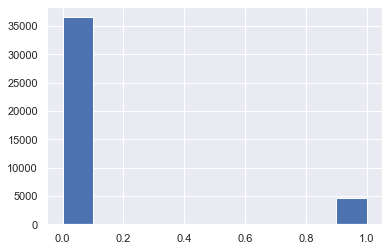

In [8]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


plt.hist(Y)
plt.show()



TRAIN: [    0     1     2 ... 41184 41185 41186] TEST: [   15    20    21 ... 41145 41163 41187]
0.11265417111780131
0.11265477892578704
0.11264870114105366


<Figure size 432x288 with 0 Axes>

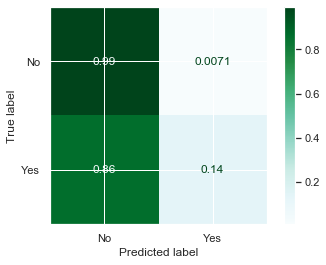

TRAIN: [    0     2     3 ... 41185 41186 41187] TEST: [    1     7     9 ... 41165 41174 41177]
0.11265417111780131
0.11265477892578704
0.11264870114105366


<Figure size 432x288 with 0 Axes>

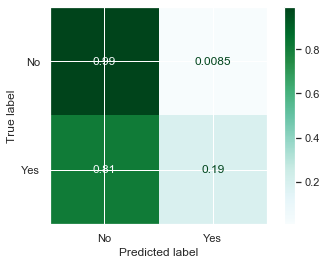

TRAIN: [    0     1     2 ... 41185 41186 41187] TEST: [   14    19    24 ... 41151 41176 41183]
0.11265417111780131
0.11265477892578704
0.11264870114105366


<Figure size 432x288 with 0 Axes>

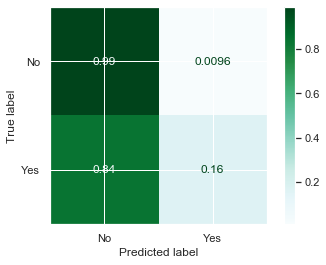

TRAIN: [    0     1     2 ... 41185 41186 41187] TEST: [   25    29    32 ... 41172 41175 41179]
0.11265417111780131
0.11265477892578704
0.11264870114105366


<Figure size 432x288 with 0 Axes>

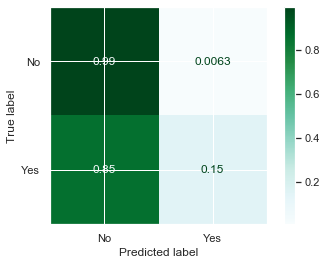

TRAIN: [    0     1     2 ... 41185 41186 41187] TEST: [   26    28    36 ... 41133 41161 41184]
0.11265417111780131
0.11265477892578704
0.11264870114105366


<Figure size 432x288 with 0 Axes>

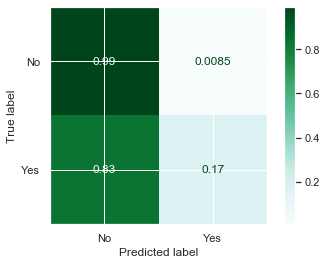

TRAIN: [    1     2     5 ... 41185 41186 41187] TEST: [    0     3     4 ... 41147 41150 41162]
0.11265417111780131
0.11265477892578704
0.11264870114105366


<Figure size 432x288 with 0 Axes>

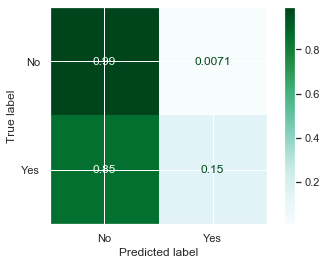

TRAIN: [    0     1     2 ... 41185 41186 41187] TEST: [    5    12    13 ... 41160 41173 41181]
0.11265417111780131
0.11265477892578704
0.11264870114105366


<Figure size 432x288 with 0 Axes>

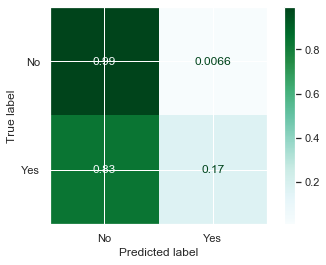

TRAIN: [    0     1     2 ... 41184 41186 41187] TEST: [    8    23    33 ... 41180 41182 41185]
0.11265417111780131
0.11265477892578704
0.11264870114105366


<Figure size 432x288 with 0 Axes>

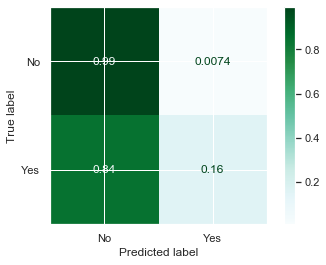

TRAIN: [    0     1     3 ... 41185 41186 41187] TEST: [    2    11    38 ... 41156 41166 41178]
0.11265417111780131
0.11265173995144322
0.11267605633802817


<Figure size 432x288 with 0 Axes>

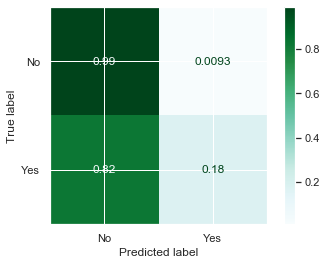

TRAIN: [    0     1     2 ... 41184 41185 41187] TEST: [    6    10    45 ... 41170 41171 41186]
0.11265417111780131
0.11265173995144322
0.11267605633802817


<Figure size 432x288 with 0 Axes>

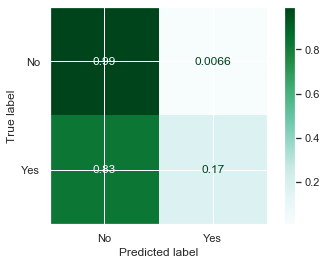

In [33]:
from sklearn.model_selection import StratifiedKFold # import KFold
from sklearn.metrics import plot_confusion_matrix

kf = StratifiedKFold(n_splits=10,shuffle=True) # Define the split - into 2 folds 
X=np.array(X)
Score=[]

for train_index, test_index in kf.split(X,Y):
    print("TRAIN:", train_index, "TEST:", test_index)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    print(len(Y[Y==1])/(len(Y[Y==0])+len(Y[Y==1])))
    print(len(y_train[y_train==1])/(len(y_train[y_train==0])+len(y_train[y_train==1])))
    print(len(y_test[y_test==1])/(len(y_test[y_test==0])+len(y_test[y_test==1])))
    
    clf = ExtraTreesClassifier(n_estimators=1000, max_depth=4)
    clf.fit(X_train,y_train)
    score_=clf.score(X_test,y_test)
    Score.append(score_)
    
    y_pred = clf.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=["No","Yes"],
                                 cmap=plt.cm.BuGn,
                                 normalize="true")

    plt.show()

In [36]:
print("predicted accuracy of each fold:",Score)

predicted accuracy of each fold: [0.8963340616654528, 0.9011896091284293, 0.8973051711580481, 0.8985190580237922, 0.898761835396941, 0.8977907259043457, 0.9002184996358339, 0.8982762806506434, 0.8989800874210782, 0.9011656143759106]


[61  2  8  7  4 60  6 49  5 43 42 50 52  3 59 53 33 34 48 44 14  0 17 10
 51 46 47 45 55 23 27 31  1 22 57 56 16 20 58 54 28 32  9 25 21 38 39 15
 11 26 18 30 36 24 41 40 19 37 13 12 29 35]
Feature ranking:
1. poutcome_success (0.170002)
2. pdays (0.165759)
3. nr.employed (0.139653)
4. euribor3m (0.126209)
5. emp.var.rate (0.083062)
6. poutcome_nonexistent (0.038803)
7. cons.conf.idx (0.031715)
8. month_mar (0.027453)
9. cons.price.idx (0.024506)
10. contact_telephone (0.023165)
11. contact_cellular (0.022900)
12. month_may (0.020397)
13. month_oct (0.020239)
14. previous (0.014469)
15. poutcome_failure (0.013781)
16. month_sep (0.012174)
17. default_no (0.006666)
18. default_unknown (0.006569)
19. month_jun (0.006171)
20. month_apr (0.006059)
21. job_retired (0.006027)
22. age (0.005481)
23. job_student (0.005408)
24. job_blue-collar (0.005269)
25. month_nov (0.002559)
26. month_dec (0.002476)
27. month_jul (0.002304)
28. month_aug (0.002004)
29. day_of_week_mon (0.001563)
30. marital

(0, 0.45199460120817486)

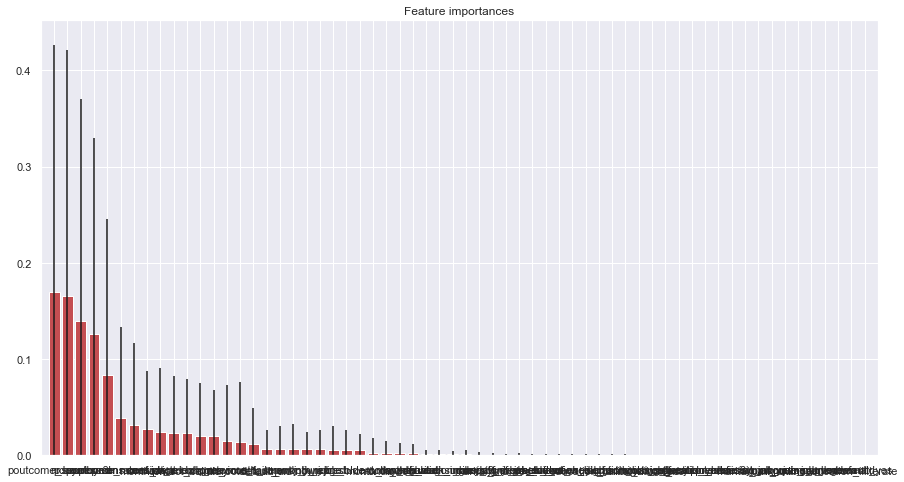

In [38]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, df_dummies.columns[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(df_dummies.columns)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

